## OBJECT DETECTION

#### Import Keras and required libraries

In [52]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2
from matplotlib import pyplot as plt

#### Models Class

In [53]:
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception,
    "resnet": ResNet50
}

use_model = "vgg16"

#### Preprocessing

In [54]:
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

In [55]:
if use_model in ["inception", "xception"]:
    inputShape = (299, 299)
    preprocess = preprocess_input

In [56]:
print(f"[+] loading {use_model} ... ", end="")
selected_network = MODELS[use_model]
model = selected_network(weights="imagenet")
print("Done")

[+] loading vgg16 ...Done


In [57]:
image_path = r"images\car.jpg"
print(f"[#] processing {image_path} ... ", end="")
image = load_img(image_path, target_size=inputShape)
image = img_to_array(image)
print("Done")

[#] processing images\car.jpg ...Done


In [58]:
image = np.expand_dims(image, axis=0)
image = preprocess(image)

In [59]:
print(f"[#] classifying image with '{use_model}'... ", end="")
predictions = model.predict(image)
top_preictions = imagenet_utils.decode_predictions(predictions)
print("Done")

[#] classifying image with 'vgg16'...Done


#### Prediction

In [60]:
for (i, (imagenetID, label, prob)) in enumerate(top_preictions[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. sports_car: 55.30%
2. forklift: 16.96%
3. go-kart: 4.84%
4. golfcart: 4.22%
5. racer: 3.21%


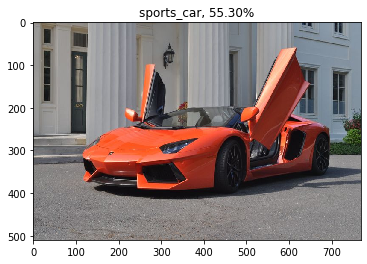

In [61]:
orig = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
(imagenetID, label, prob) = top_preictions[0][0]
plt.title("{}, {:.2f}%".format(label, prob * 100))
plt.imshow(orig)
plt.show()